# Explore Annual Maximum daily Precipitation in Brazil

To be defined

In [ ]:

library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

O código abaixo lê o arquivo original gerado pelo Eng. Saulo Aires de Souza, que contém os valores das precipitações máximas diárias e respectivos anos. Esse código só deve ser gerado de novo caso um novo arquivo original seja atualizado. Caso contrário, deve-se utilizar o arquivo RDS contido no diretório.

In [ ]:
# Code written by Thiago Lappicy with comments by Dirceu Reis

# Extract metadata only (first 15 lines)
Pd_metadata <-
  read.csv("DADOS_CONV_SAULO.dat", header = FALSE, sep = ";",
           nrows = 15, dec = ".",na.strings = "null",
           fileEncoding = "latin1")

# Extract Dates and Annual Maximum Daily Precipitation (20th to 112nd lines)
Pd_tmp <-
  read.csv("DADOS_CONV_SAULO.dat", header = TRUE, sep = ";",
           skip = 20, dec = ".", na.strings = "null")

# Create an empty dataframe with the correct columns
Pd <- as.data.frame(matrix(data = NA, nrow = 0, ncol = 17))   

# Name the columns
colnames(Pd) <- c("Date", "Pdmax", Pd_metadata[,1])

# Combine both dataframes with only one column for "Data" and one for "Pdmax"
# Obs: the original file contains one column in excess. That is why we use 
# "to = ncol(Pd_metadata) - 1" in the function "seq" below

for(i in seq(from = 1, to = ncol(Pd_metadata) - 1, by = 2)){
  
  # Printar uma mensagem a cada 500 estações pra ter certeza que ta rodando
  if((i+1) %% 500 == 0) cat("Rodando iteração: ", i+1, "...\n")
  
  # Include the metadata contained in Pd_metadata
  # Get only the second column of station "i" and transpose the whole column
  # so it becomes a line with metadata
  metadata_proxy <- as.data.frame(t(Pd_metadata[,(i+1)])) 
  # Copy metadata to all possible observations (max.number.observations = 112)
  metadata_proxy[1:112,] <- metadata_proxy
  # Name the column
  colnames(metadata_proxy) <- Pd_metadata[,1]
  
  # Include the annual maximum daily Precip and Date (Date + Pdmax + Metadata)
  Pd[(nrow(Pd)+1):(nrow(Pd)+nrow(Pd_tmp)),] <-
    cbind(Pd_tmp[,c(i, i+1)], metadata_proxy)
  
}


# Zerar as linhas que tem valores NAs de Data E valor (2 terços +-)
# 425600 pra 156529
Pd <- Pd[-which(is.na(Pd$Pdmax) & is.na(Pd$Date)),]

saveRDS(Pd, "Pd.rds")

rm(metadata_proxy)
rm(Pd_metadata)
rm(Pd_tmp)


In [ ]:

# Load te data
Pd <- readRDS("Pd.rds")

# Create a new column with the year of the observation right after the date
Pd <- Pd %>% mutate(Ano = year(as.Date(Date,"%d/%m/%Y")), .after = Date)

n_stations_year <- Pd %>% select(c(2,4)) %>%
  count(Ano)

n_stations_year_bacia <- Pd %>% select(c(2,4)) %>%
  count(Ano,BaciaCodigo)


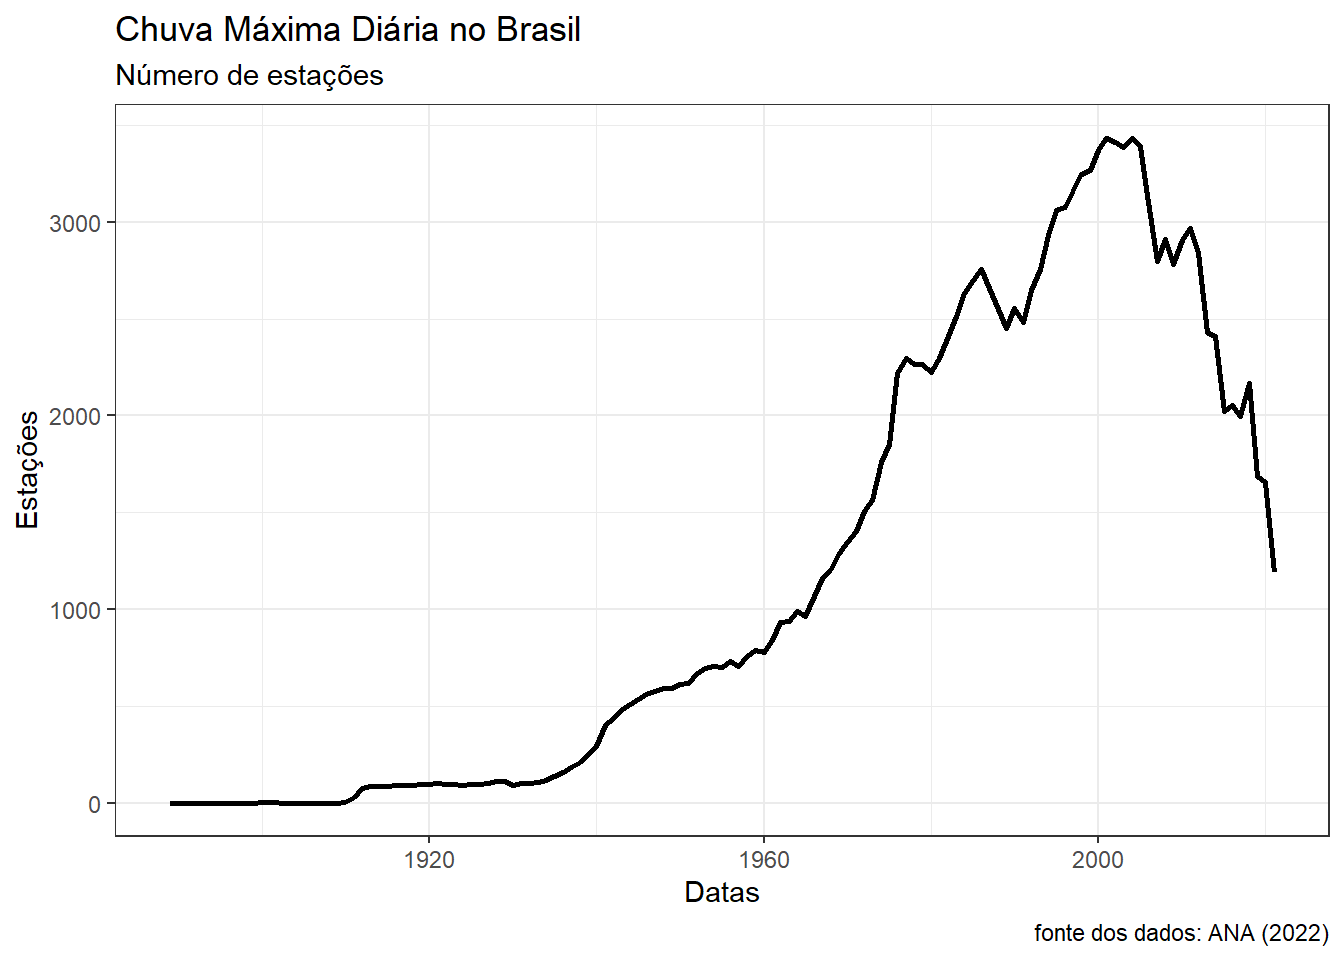

In [ ]:

ggplot() +
  geom_line(data = n_stations_year,aes(Ano,n),colour = 'black', size = 1) +
   labs(title = "Chuva Máxima Diária no Brasil", subtitle = "Número de estações",
       caption = "fonte dos dados: ANA (2022)",
       x = "Datas", y = "Estações") +
  theme_bw()
